In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
geom_mean_3d = pd.read_csv("non-pendulum-geom-mean.csv")
geom_mean_pen = pd.read_csv("pendulum-geom-mean.csv")

In [3]:
sns.set(font_scale=1.75)
sns.set_style('whitegrid')
#colors = [(147/255,205/255,221/255), "#00058A", "#6A0078", (96/255,74/255,123/255), "#8E6100"]
colors = ["#00abdf", "#00058A", "#6A0078", (96/255,74/255,123/255), "#8E6100"]
sns.set_palette(sns.color_palette(colors))

from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=[r'\usepackage{sansmath}', r'\sansmath']) #r'\usepackage{DejaVuSans}'
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans']})
rc('xtick.major', pad=12)
rc('ytick.major', pad=12)
rc('grid', linewidth=1.3)
#import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 1000

Text(0.5, 0.98, 'Prediction over 100 timesteps')

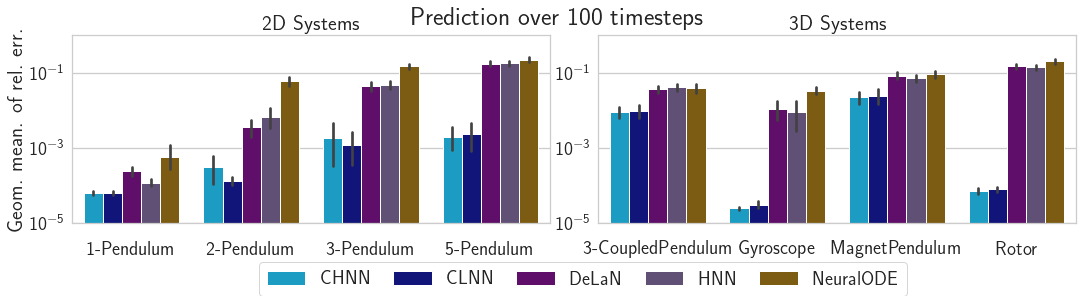

In [4]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 4))

sns.barplot(data=geom_mean_pen, x="Body", y="Geometric Mean",
             ci=95, hue="Network", ax=axes[0])
axes[0].set(yscale="log", ylabel="Geom. mean. of rel. err.", xlabel=None,
       title="2D Systems",
       ylim=(1e-5, 1))
axes[0].legend().remove()

sns.barplot(data=geom_mean_3d, x="Body", y="Geometric Mean",
             ci=95, hue="Network", ax=axes[1])
axes[1].set(yscale="log", ylabel=None, xlabel=None,
       title="3D Systems",
       ylim=(1e-5, 1))
axes[1].legend().remove()

axes[0].tick_params(axis='y', which='major', pad=1)
axes[1].tick_params(axis='y', which='major', pad=1)

#xlabels = [f"{system}" for system in geom_mean_3d["Body"].unique()]
#ax.set_xticklabels(xlabels, rotation=0)

handles, labels = axes[1].get_legend_handles_labels()
fig.subplots_adjust(bottom=0.23, wspace=0.1)
fig.legend(handles=handles, labels=labels, bbox_to_anchor=(0.2, 0., 0.5, 0.), loc="lower center", ncol=len(labels), borderaxespad=0.,
           mode="expand")
fig.suptitle("Prediction over 100 timesteps")
#fig.legend(handles=handles, labels=labels, bbox_to_anchor=(0., 0.04, 1.0, 0.1), loc="lower center", ncol=len(labels), borderaxespad=0.1, mode="expand")

In [5]:
fig.savefig("geom-mean.pdf", bbox_inches="tight")